<h1 style="font-size:60px; 
           color:green;
           text-align:center">
    PROYECTO CIENCIA DE DATOS</h1>

# Table of Contents

* [__Proyecto final 0__](#chapter1)
    * [__Presentacion 0.1__](#section_0_1)
* [__Objetivo 1__](#section_1)
* [__Contexto analitico 2__](#section_2)
* [__Data Acquisition 3__](#section_3)
    * [__Librerias 3.1__](#section_3_1)
    * [__Conexion a la API 3.2__](#section_3_2)
    * [__Bajada de datos desde la API 3.3__](#section_3_3)
    * [__Almacenamiento de datos 3.4__](#section_3_4)
* [__Exploratory Data Analysis 4__](#section_4)
    * [__Creacion del dataframe 4.1__](#section_4_1)
    * [__Campeones mains del jugador 4.2__](#section_4_2)
    * [__Taza de victorias 4.3__](#section_4_3)
    * [__Lienas jugadas 4.4__](#section_4_4)
    * [__Cantidad de jugadas con asesinatos multiples 4.5__](#section_4_5)
    * [__Farmeo por minuto 4.6__](#section_4_6)
    * [__KDA (kills, deaths, assistants) 4.7__](#section_4_7)
    * [__KDA por campeon 4.8__](#section_4_8)
    * [__Vision en el mapa 4.9__](#section_4_9)
    * [__Mapa de correlacion de variables 4.10__](#section_4_10)
    * [__Asistencias en partida 4.11__](#section_4_11)
* [__Data Wrangling 5__](#section_5)
    * [__Descubrimiento 5.1__](#section_5_1)
    * [__Estructuracion 5.2__](#section_5_2)
    * [__Limpieza 5.3__](#section_5_3)
    * [__Enriquecimiento 5.4__](#section_5_4)
    * [__Validacion 5.5__](#section_5_5)
* [__Feature selection 6__](#section_6) 
* [__Machine Learning 7__](#section_7)
* [__Conlusion 8__](#section_8)
* [__Futuras lineas 9__](#section_9)
* [__Entrega de desafio 10: Obtencion de Insights__](#section_10)
    * [__Consigna 10.1__](#section_10_1)
    * [__Preguntas potecniales 10.2__](#section_10_2)
    * [__Obtencion de los Insights 10.3__](#section_10_3)
    * [__Conclusiones 10.4__](#section_10_4)

---

# 0. Proyecto final 

## Presentacion 0.1

_¿Cual es la probabilidad que tengo de ganar o perder una partida de un videojuego?_ Esta, es la pregunta principal que vamos a investigar a lo largo de este proyecto. El juego Leagoe of Legend consta de dos equipos 5 vs 5 que el objetivo de cada equipo es destruir la base enemiga. Para esto, el mapa se compone por tres lineas en las cuales iran los jugadores. Existen multiples personajes para jugar en cada partida que reciben el nombre de campeones. Estos últimos se diferencias por categorias, role, funcion y habilidades. Dependiendo de cada campeon, tiene un impacto distinto en la partida. Entonces... ¿Como vamos a realizar este proyecto? Para el mismo, se considerara el historial de juego de un jugador en especifico y de esta forma realizaremos predicciones en base a las caracterisitcas de juego de este. 

# 1. Objetivo 

_¿Cual es la probabilidad de ganar o perder?_ Como  vimos en el apartado anterior este es el objetivo de este proyecto. Se quiere investigar las mukltiples variables que disponemos dentro de las APIs del League Of Legends, de ahora en adelante lo llamaremos lol, para asi de esta forma encontrar la coneccion que tenemops entre ellas a lo largo del historial del jugador. En base al historial historico de un jugador, analizaremos todas sus partidas para comenzar a deducir patrones, aspectos que se compartan. Algunos de ellos pueden ser con quien juega acompañado por ejemplo, mientras que otros pueden ser conceptos mas tecnicos dentro del mismo juego como el nivel de farmeo (hace referencia a la cantidad de subditos que elimino) entre muchos otros. 

Para la resolucion de esta problematica existen alguns preguntas que pueden comenzar a guiar el proyecto en un rumbo. Debajo se dejara un listado con las mismas:

- ¿Cuantas partidas jugo el jugador en los ultimos 5 años?¿Cuantas por año?
- ¿Cual es el KDA (kill, deaths, assistants) del mismo?¿Como fue evolucionando en cada año?
- ¿Cuales son los campeones que más usa?¿Como evoluciono con cada uno (KDA con el campeon)?
- ¿Cuales son los campeones con mayor nivel de maestria que posee?
- ¿Cual es el nivel de farmeo del jugador?
- ¿Cual es el nivel de vision del mapa del jugador?
- ¿En que linea se desempeño mejor?¿Que clase de campeon empleo para ello?

# 2. Contexto analitico

Para este proyecto analizaremos el historial de partidas junto a otras caracteristicas de cada un jugador. Para obtener estos datos implementaremos el uso directo de las APIs proporcionadas por Riot Games (desarrolladora del juego). Entre ellas nos podemos encontrar los siguientes links que estaremos usando.

__Developers home page__
- https://developer.riotgames.com/

__APIs de Riot Games__
- https://developer.riotgames.com/apis#league-v4

__APIs information__
- https://developer.riotgames.com/docs/portal#_overview

Mediante el uso de estos 3 links vamos a extraer los datos que necesitaremos para realizar nuestro proyecto. A continuacion veremos una breve muestra de como funcionan.

Ingresando en el primer link obtenemos acceso a los datos principales de la cuenta como developers, en donde veremos nuestro API's Key para el acceso a los datos.

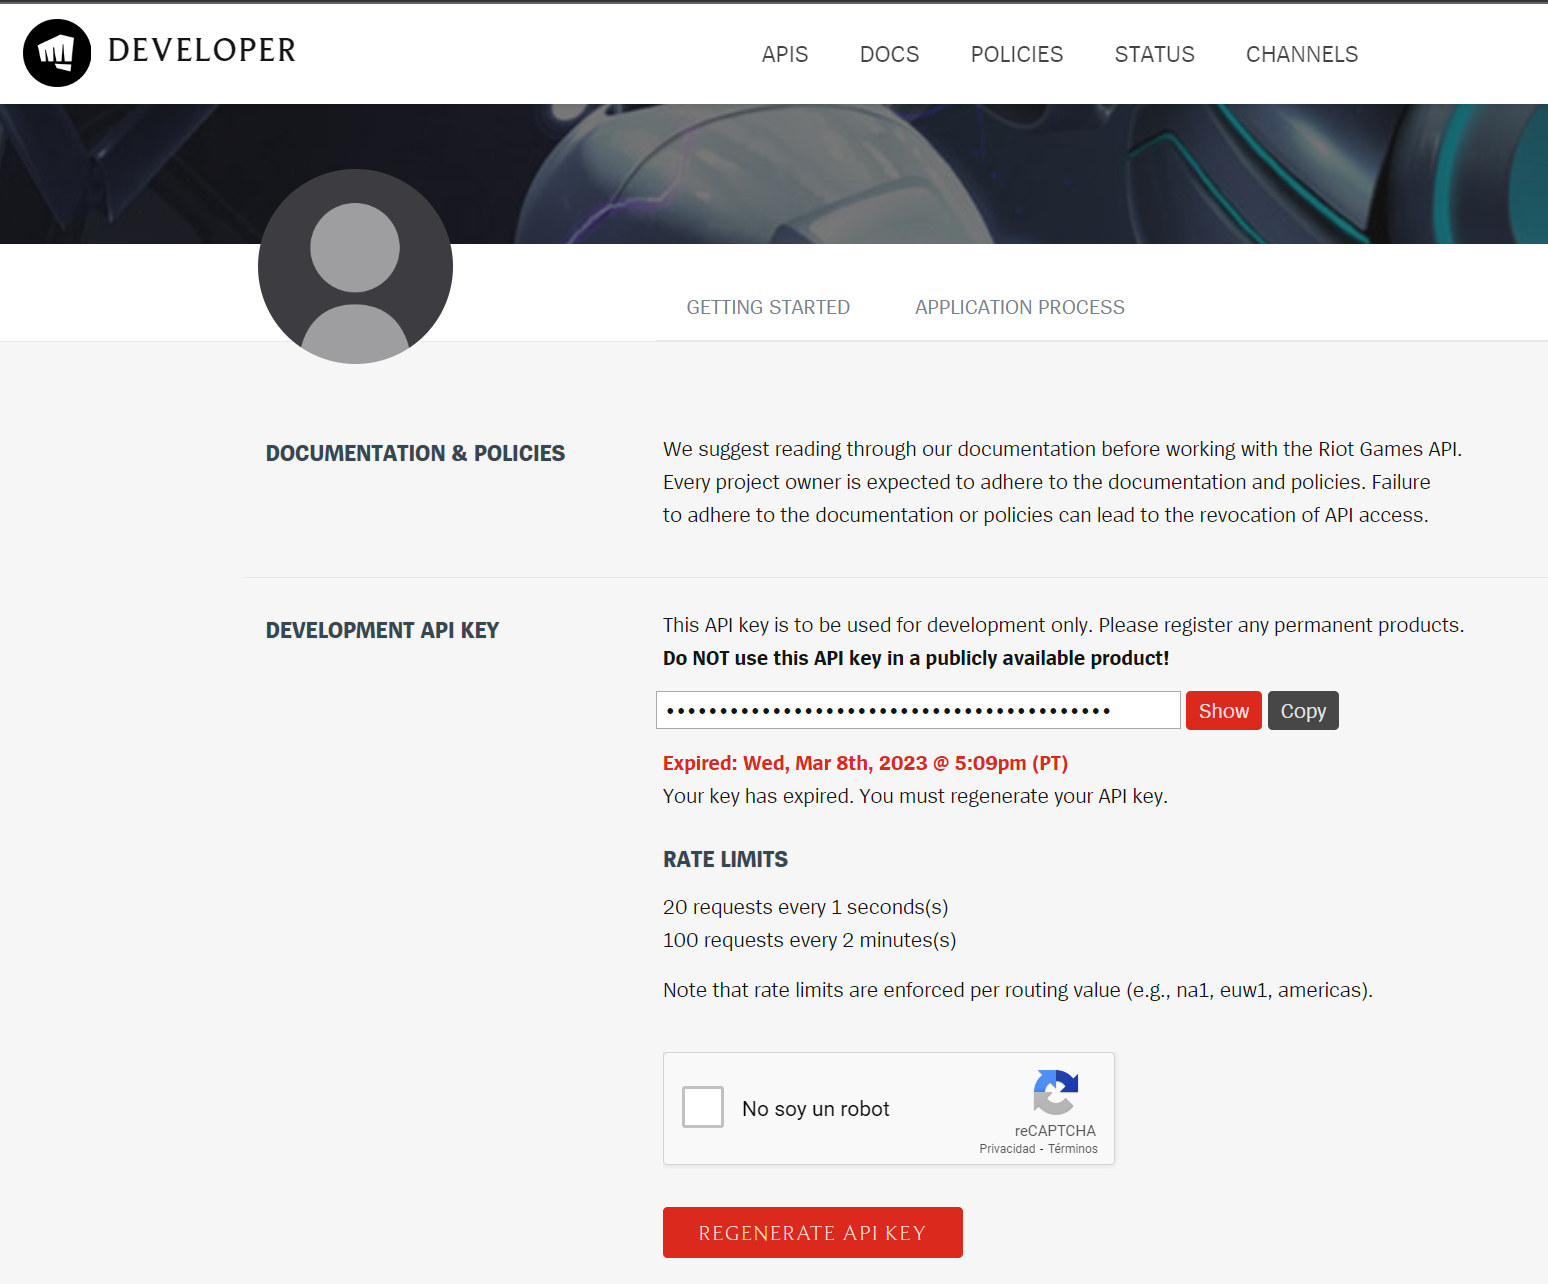

Con el segundo link lo que hacemos es obtener los accesos a todas las APi's que Riot nos ofrece entre las cuales podemos encontrar algunas como las siguientes.

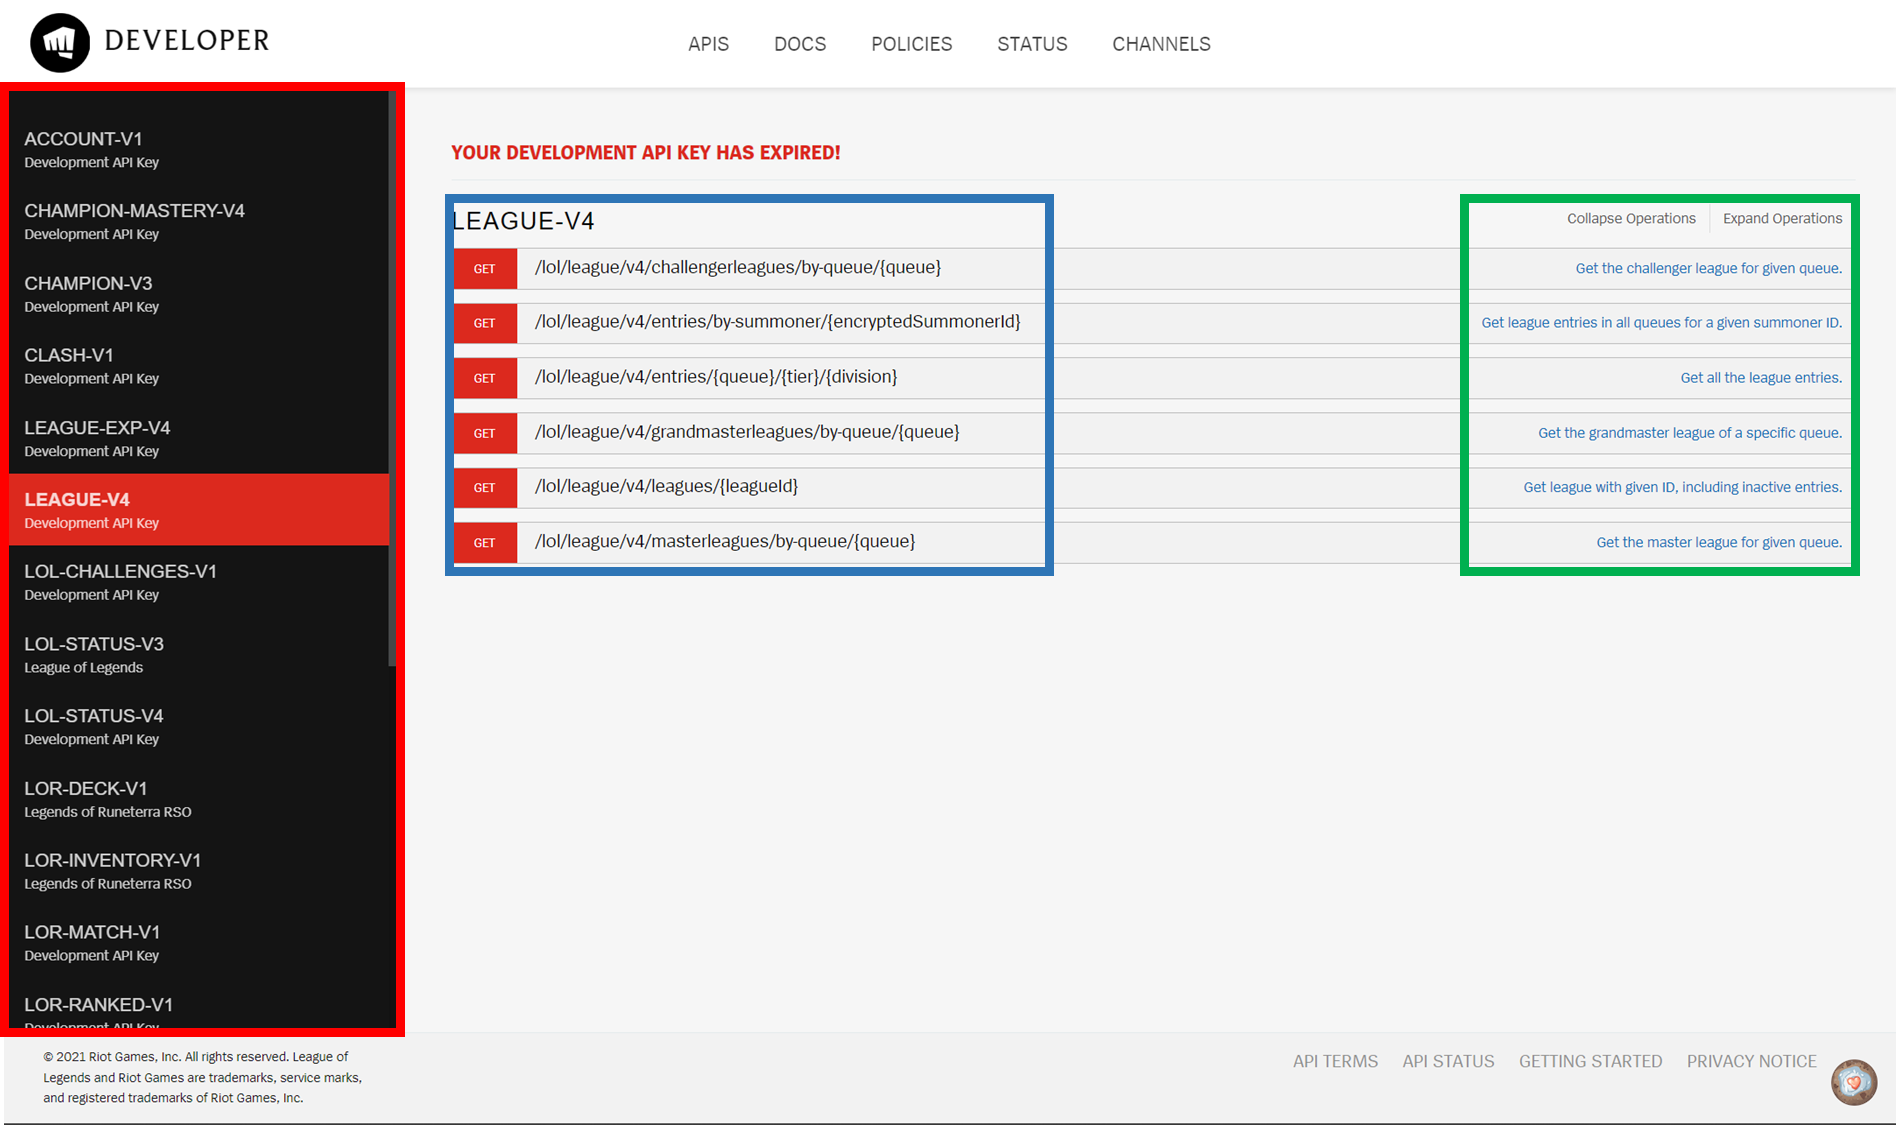

En esta imagen podemos ver tres recuadros:

- <span style="color:red">Rojo</span>: Tenemos un listado de todas las Apis que nos proporciona Riot Games para sus multiples juegos.
- <span style="color:green">Verde</span>: Tenemos una breve descripcion de los datos que podemos obtener en base a las APIs que nos brindan.
- <span style="color:blue">Azul</span>: Tenemos un listado de las conecciones e indicaciones de que requisitos se neceistan para acceder.

Mediante el uso de estas APIs que mostramos se obtendran todos los datos que haran falta para realizar la investigacion permitenente al proyecto. Todas estas APIs nos devuelven un archivo JSON el cual tendremos que ir trabajando para desarrollarlo como un pandas Data Frame t de esta forma poder trabajarlos.

# 3. Data acquisition 

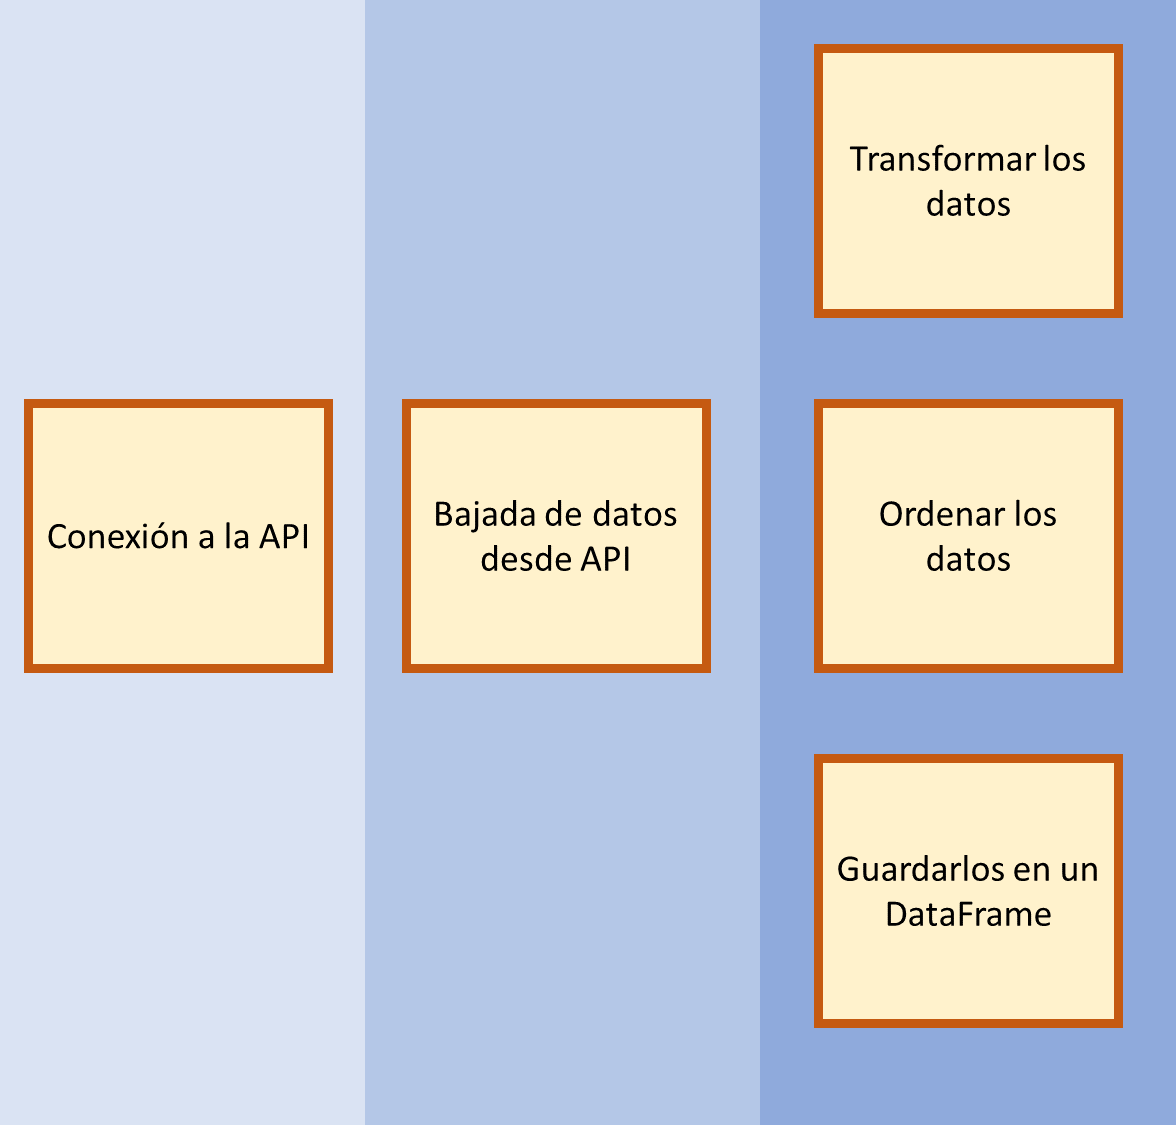

## Librerias 3.1

In [1]:
# Para trabajar los datos
import json
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os 

# Para eliminar los carteles warnings
import warnings as wn

# Para datos faltantes
import missingno as msno

# Importamos las librerias para realizar los graficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importamos las librerias para machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



## Conexion a la API 3.2

In [17]:
# Cargamos la APY KEY dentro de nuestro entorno
key_admin = os.path.join('conf', '.env')
key_admin = config('key_admin')

In [5]:
######################################################################################
######################################################################################

# Creamos una funcion que nos devuelva los datos del usuario en base al nombre de invocador

def datos_invocador(nombres_invocador:list)->pd.DataFrame:
    
    # Definimos algunas variables
    key = key_admin
    region = 'LA2'
    
    # Creamos la variable para almacenar 
    df_personal_infomation = pd.DataFrame()
    
    # Creamos un bucle for para que funcionen la lista de nombres a emplear.
    for nombre_invocador in nombres_invocador:
        
        # Conectamos a la API
        url = f'https://{region}.api.riotgames.com/lol/summoner/v4/summoners/by-name/{nombre_invocador}?api_key={key}' 
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Error: no se pudo obtener la maestría de campeones del invocador {nombre_invocador}.")
            return None

        # Lo transformamos en un texto
        texto = response.text

        # Lo transformamos en un JSON y lo normalizamos en un pd.df
        json_info = json.loads(texto)
        personal_infomation = pd.json_normalize(json_info)

        # Almacenamos los datos
        df_personal_infomation = pd.concat([df_personal_infomation, personal_infomation], ignore_index=True)

        print(f'Se finalizo el proceso de transformacion para {nombre_invocador}.')
    
    return df_personal_infomation

######################################################################################
######################################################################################

# Creamos una funcion que nos traigan el nivel de maestria del jugafor con cada campeon

def champions_mastery(nombres_invocador:list)->pd.DataFrame():
    
    data_summoner = information #Aqui deberemos de nombrar la var igual que el df que almacene los datos de los jugadores
    
    # Definimos algunas variables
    key = key_admin
    region = 'LA2'
    
    # Creamos un dataframe vacio
    df_summoner_mastery = pd.DataFrame()
    
    # Tenemos que obtener el id del dataframe obtenido anteriormente en base al nombre que ingresemos
    summoners_id = data_summoner[data_summoner['name'] == nombres_invocador]['id']
    
    # Creamos un bucle for para que tome todos los nombre que indiquemos
    for summoner_id in summoners_id:
    
        # Nos conectamos a la api para obtener los datos
        api_for_mastery = f'https://{region}.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/{summoner_id}?api_key={key}'

        response = requests.get(api_for_mastery)
        if response.status_code != 200:
            print(f"Error: no se pudo obtener la maestría de campeones del invocador {summoner_id}.")
            return None

        # Lo transformamos en un texto
        texto = response.text

        # Lo transformamos en un JSON y lo normalizamos en un pd.df
        json_info = json.loads(texto)
        mastery_information = pd.json_normalize(json_info)

        # Almacenamos los datos
        df_summoner_mastery = pd.concat([df_summoner_mastery, mastery_information], ignore_index=True)

        print(f'Se finalizo el proceso de transformacion para {summoner_id}.')
        
    # Trabajamos los datos para que nos traiga como columna tambien el nombre del invocador
    df_summoner_mastery.rename(columns={'summonerId':'id'}, inplace = True)
    df_summoner_mastery = df_summoner_mastery.merge(data_summoner[['name', 'id']], on='id', how='left')
    
    return df_summoner_mastery

######################################################################################
######################################################################################

# Definimos una funcion que nos traiga los datos de los personajes segun la version de juego

def champions_information(version:str)->pd.DataFrame:
    
    # version = 13.5.1
    # Definimos el url junto a nuestra version como variable 
    url_champions_information = f'http://ddragon.leagueoflegends.com/cdn/{version}/data/en_US/champion.json'
    
    # Nos conectamos a la api para obtener los datos
    response = requests.get(url_champions_information) 
    if response.status_code != 200:
        print("Error: no se puedo conectar correctamente a la api, controlar version del juego")
        return None
    
    # Lo transformamos en un texto
    texto = response.text
    
    # Lo transformamos en un json y comenzamos a extraer los distintos datos
    json_info = json.loads(texto)
    
    # Convertimos los diccionarios anidados de "info" y "stats" en columnas separadas
    champions_data = []
    for champion_id, champion_data in json_info["data"].items():
        champion_data["id"] = champion_id
        champion_data.update(champion_data.pop("stats"))
        champion_data.update(champion_data.pop("info"))
        champions_data.append(champion_data)

    # Creamos el DataFrame
    champions_data = pd.DataFrame(champions_data)
    champions_data.drop(columns="image", inplace=True)

    return champions_data

######################################################################################
######################################################################################

# Definimos una funcion que nos traiga el id de las partidas que vamos a usar

def historial_partidas(nombre_invocador:str)->list:
    
    # En base al nombre del invocador deberemos conectarnos a sus datos y obtener el puuid
    puuid = list(datos_invocador([nombre_invocador])["puuid"])[0]
    
    # Definimos alguna variables
    start_time = 1577880000
    type_game = "ranked"
    start = 0 
    count = 100
    match_ids = []
    
    # Creamos el bucle
    # Hacer solicitudes GET a la API hasta que no haya más resultados disponibles
    while True:
        # Hacer solicitud GET a la API
        response = requests.get(f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?startTime={start_time}&type={type_game}&start={start}&count={count}&api_key={key_admin}")

        # Verificar si la solicitud fue exitosa
        if response.status_code != 200:
            print("Error al hacer la solicitud")
            break
        else:
            # Obtener la lista de Id de partida a partir de la respuesta JSON
            new_match_ids = response.json()

            # Si no hay más resultados disponibles, salir del bucle
            if len(new_match_ids) == 0:
                break
            else:
                # Agregar los nuevos Id de partida a la lista
                match_ids += new_match_ids

                # Incrementar el valor de "start" para obtener los próximos resultados
                start += count

    # Ordenar la lista de Id de partida por fecha de manera ascendente
    match_ids.sort(reverse=False)
    
    id_games = match_ids

    return id_games

######################################################################################
######################################################################################

### Eliminamos la columna que nos complica todco ###
# Definimos una funcion que nos devuelva el detalle de nuestra partida en base al id de la misma

def detalle_partidas(id_partida:str)->pd.DataFrame:
    
    # Establecemos una coneccion con la API para extraer los datos
    url = f"https://americas.api.riotgames.com/lol/match/v5/matches/{id_partida}?api_key={key_admin}"
    
    try:
        # Establecemos la coneccion con la api
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Error al obtener los datos de la partida {partida}.")
        else:
            None

        # Convertimos el json
        json_info = json.loads(response.text)

        # Comenzamos a transformar el json en un df
        match_information = pd.DataFrame(json_info['info']['participants'])
        
        # Reiniciamos el índice para evitar índices duplicados
        match_information.reset_index(drop=True, inplace=True)

        # Nos fijamos si existe la columna challenges
        if 'challenges'in match_information.columns: 

            # Desglozamos la columna que quedo como un diccionario
            match_information.drop(['challenges'], axis=1, inplace = True)
            
        else:
            None

        # Eliminamos las columnas que no nos sirven
        match_information.drop(['perks'], axis=1, inplace = True)

        # Establecemos una columna con el nombre del id de la partida
        match_information['id_game'] = id_partida
        print(f"Se finalizo el proceso para la partida {id_partida}")

        return match_information
    
    except Exception as e:
        print(f"Error al obtener los datos de la partida {id_partida}: {e}")
        return pd.DataFrame()

######################################################################################
######################################################################################

# Creamos una funcion que actue como bucle for
def detalle_partidas_lista(lista_partidas):
    # Creamos un DataFrame vacío para ir almacenando los resultados
    df_resultados = pd.DataFrame()
    
    # Iteramos sobre cada elemento de la lista
    for partida in lista_partidas:
        # Llamamos a la función detalle_partidas() para obtener el detalle de la partida actual
        detalle_partida = detalle_partidas(partida).reset_index(drop=True)
        
        # Concatenamos el resultado al DataFrame de resultados
        df_resultados = pd.concat([df_resultados, detalle_partida])
    
    # Devolvemos el DataFrame final con los detalles de todas las partidas
    return df_resultados.reset_index()

######################################################################################
######################################################################################

# Creamos una funcion que nos devuelva los detalles de challenges para aquellas partidas en donde exista.
def detalle_challenge_partida(id_partidas: list[str]) -> pd.DataFrame:
    # Definir un DataFrame vacío para almacenar la información de todas las partidas
    df_todas_las_partidas = pd.DataFrame()
    
    # Establecemos la conexión a la API
    for id_partida in id_partidas:
        url = f"https://americas.api.riotgames.com/lol/match/v5/matches/{id_partida}?api_key={key_admin}"
        try:
            # Nos conectamos a la API
            response = requests.get(url)
            if response.status_code != 200:
                print(f"Error al obtener los datos de la partida {id_partida}.")
            else:
                None

            # Convertimos el json
            json_info = json.loads(response.text)

            # Comenzamos a transformar el json en un df
            match_information = pd.DataFrame(json_info['info']['participants'])

            # Reiniciamos el índice para evitar índices duplicados
            match_information.reset_index(drop=True, inplace=True)

            # Evaluamos la existencia de la columna challenge
            if 'challenges' in match_information.columns:

                # Desenglozamos los archivos
                df_challenges = pd.json_normalize(match_information['challenges'])

                # Le creamos la columna con el id de la partida
                df_challenges['id_game'] = id_partida
                df_challenges['summonerId'] = match_information['summonerId']

            # En caso de no existir que no haga nada
            else:
                print(f"No se encontraron datos sobre la columna challenges para {id_partida}")
                df_challenges = pd.DataFrame()

            # Concatenar el DataFrame temporal con el DataFrame vacío
            df_todas_las_partidas = pd.concat([df_todas_las_partidas, df_challenges], ignore_index=True)

        except Exception as e:
            # Que nos tire un error por no traer los datos
            print(f"Error al obtener los datos de la partida {id_partida}: {e}")
            
    # Devolver el DataFrame que contiene la información de todas las partidas
    return df_todas_las_partidas

######################################################################################
######################################################################################

## Bajada de datos desde la API 3.3

In [28]:
# Extraemos los datos del jugador
information = datos_invocador(['GC Darius Brando'])

# Extraemos los datos de las maestrias de los campeones que usa el jugador
maestrias_campeones = champions_mastery('GC Darius Brando')

# Extraemos la informacion sobre el campeon del parche actual
informacion_campeones = champions_information('13.5.1')

# Extraemos el historial de partidas para el jugador
id_partidas = historial_partidas('GC Darius Brando')

# Traemos todas las partidas sin la columna challenges
games_information = detalle_partidas_lista(id_partidas)

#Traemos tambien la parte challenges por otro lado
challenges_data = detalle_challenge_partida(id_partidas)

# Unimos challenges con las partidas sin el mismo
df_games = games_information.merge(challenges_data, on=['id_game','summonerId'], how='left')

Se finalizo el proceso de transformacion para GC Darius Brando.


## Almacenamiento de datos 3.4

In [46]:
# Definimos la ruta de almacenamiento
path = 'data/'

# Descargamos cada uno de los df para no tener que esperar que se corra el proceso anterior cada vez que desiemos trabjar
information.to_csv(path+'information.csv', index=False)
maestrias_campeones.to_csv(path+'maestrias_campeones.csv', index=False)
informacion_campeones.to_csv(path+'informacion_campeones.csv', index=False)
(pd.DataFrame({'lista':id_partidas})).to_csv(path+'id_partidas.csv', index=False)
games_information.to_csv(path+'games_information.csv', index=False)
challenges_data.to_csv(path+'challenges_data.csv', index=False)
df_games.to_csv(path+'df_games.csv', index=False)

In [2]:
# Cargamos todos los dataframe desde los csv para trabajar de manera mas eficaz la promixa
information = pd.read_csv('data/information.csv')
maestrias_campeones = pd.read_csv('data/maestrias_campeones.csv')
informacion_campeones = pd.read_csv('data/informacion_campeones.csv')
id_partidas = (pd.read_csv('data/id_partidas.csv'))['lista'].tolist()
games_information = pd.read_csv('data/games_information.csv')
challenges_data = pd.read_csv('data/challenges_data.csv')
df_games = pd.read_csv('data/df_games.csv')

C:\Users\herne\AppData\Local\Temp\ipykernel_14148\2799268752.py:8: DtypeWarning: Columns (106) have mixed types. Specify dtype option on import or set low_memory=False.
  df_games = pd.read_csv('data/df_games.csv')


# 4. Exploratory data analysis 

El objetivo de este paso es encontrar aquellas preguntas que nos plantenamos al comienzo del proyecto.

- ¿Cuantas partidas jugo el jugador en los ultimos 5 años?¿Cuantas por año?
- ¿Cual es el KDA (kill, deaths, assistants) del mismo?¿Como fue evolucionando en cada año?
- ¿Cuales son los campeones que más usa?¿Como evoluciono con cada uno (KDA con el campeon)?
- ¿Cuales son los campeones con mayor nivel de maestria que posee?
- ¿Cual es el nivel de farmeo del jugador?
- ¿Cual es el nivel de vision del mapa del jugador?
- ¿En que linea se desempeño mejor?¿Que clase de campeon empleo para ello?

En base a los multiples graficos que desarrollemos podremos ir encontrando respuestas a estas primeras preguntas que encontramos de interes. En base al desarrollo de las mismas podremos entender mejor las variables y si hay algunas mas que encontremos de mucho valor a la hora de encontrar como armar nuestro modelo final de prediccion. 

## Creacion del dataframe 4.1

Creamos un funcion que nos devuelva los datos para un jugador en especifico.

In [3]:
######################################################################################
######################################################################################

# Definimos algunos datos que vamos a definir para trabajar
def historial_del_jugador(nombre_jugador:str)->pd.DataFrame:
    # Extraemos el id del jugador
    id_del_jugador = df_games[df_games['summonerName'] == nombre_jugador]['summonerId'].unique().item()
    
    # Ahora con el id nos quedamos unicamente con las partidas que deseamos
    historial_partidas = df_games[df_games['summonerId'] == id_del_jugador]
    
    return historial_partidas

######################################################################################
######################################################################################

In [4]:
games_from_GCDariusBrando = df_games[df_games['summonerId'] == 'K2twAA5gA-gMXY4YVq0szKaX-er9Hlhz8sitMu4lzN00Qw']
# games_from_GCDariusBrando.to_csv('testeo.csv', index=False)

In [5]:
games_from_GCDariusBrando.head()

,index,assists,baronKills,bountyLevel,champExperience,champLevel,championId,championName,championTransform,consumablesPurchased,...,killAfterHiddenWithAlly,killedChampTookFullTeamDamageSurvived,knockEnemyIntoTeamAndKill,pickKillWithAlly,saveAllyFromDeath,survivedThreeImmobilizesInFight,tookLargeDamageSurvived,takedownsFirstXMinutes,killingSprees_y,playedChampSelectPosition
5,5,8,0,0,12785,14,36,DrMundo,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0,8,0,1,13323,15,122,Darius,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,5,11,0,4,12193,14,36,DrMundo,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,5,11,0,2,15230,16,36,DrMundo,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,0,3,0,0,9350,12,36,DrMundo,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Campeones mains del jugador 4.2

_Buscaremos encontrar aquellos campeones que el jugador mas domina en todo el histora_


C:\Users\herne\AppData\Local\Temp\ipykernel_10124\495099146.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  champ_names.rename(columns={'key':'championId', 'name':'champ_name'}, inplace=True)


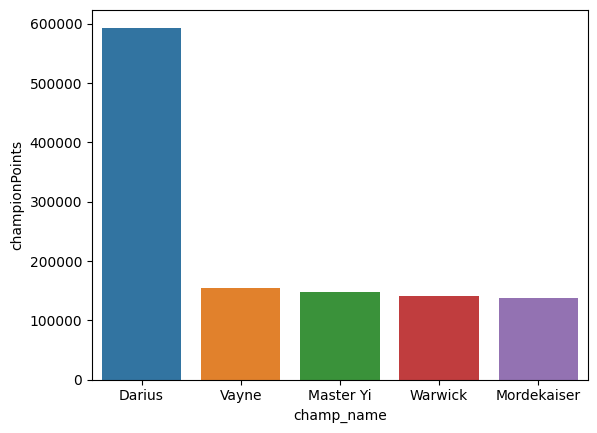

In [8]:
# # Controlamos un poco los datos para saber que podemos graficar en base a los datos
# print(maestrias_campeones.info())
# Le agregamos la columna del nombre a los campeones
champ_names = informacion_campeones[['key', 'name']]
champ_names.rename(columns={'key':'championId', 'name':'champ_name'}, inplace=True)
maestrias_campeones = maestrias_campeones.merge(champ_names, on='championId', how='left')

# Creamos un grafico de barras con los datos del usuario
sns.barplot(x='champ_name',
            y='championPoints',
            data=maestrias_campeones.nlargest(5, 'championPoints'))

wn.filterwarnings('ignore')

En este grafico podemos ver los personajes, de ahora en mas llamaremos campeones, que mas emplea el jugador a lo largo de sus partidas. Aqui podemos ver el nombre de dichos campeones en donde luego podemos ver cuales son las caracteristicas de dichos campeones en el df de informacion_campeones. 

Como podemos ver el jugador juega mayormente con campeones 'Fighter' y 'Assassins' con niveles de dificultad mayormente bajo.

## Taza de victorias 4.3

_Observaremos el porcentaje de victorias y derrotas que posee el jugador a lo largo de todo el historial de partidas que tenemos_

([<matplotlib.patches.Wedge at 0x13a6705fa60>,
 [Text(-1.099625141967287, -0.028714929103596635, 'Perdio'),
  Text(1.099625141967287, 0.0287149291035965, 'Gano')],
 [Text(-0.5997955319821564, -0.015662688601961797, '50.8%'),
  Text(0.5997955319821564, 0.015662688601961725, '49.2%')])

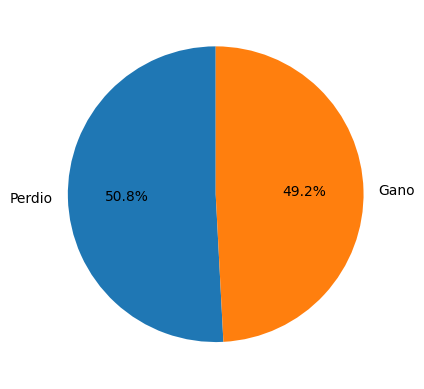

In [9]:
# Creamos un grafico de torta con los datos de victoria y derrota del jugador
Cantidad_victorias = games_from_GCDariusBrando['win'].value_counts()

# Graficamos los datos
plt.pie(Cantidad_victorias, labels=['Perdio', 'Gano'], autopct='%1.1f%%', startangle=90)

Como podemos observar en el grafico superior, el jugador tiene un porcenataje de victorias y derrotas muy parejo, llegando casi a un 50% en ambos casos. Lo que podemos ver es que el desempeño del mismo es bastante irregular dado que podemos asumir que de cada 2 partidas por lo menos gana 1.

## Lineas jugadas 4.4

_Buscaremos cual es la linea principal del jugador. Dado que en el juego exiten un total de 4 lineas, buscaqueremos identificar cual es en la que mas juega y mejor se desenpeña en las partidas. Osea en cual gana mas y en cual pierde mas._

<Axes: xlabel='count', ylabel='individualPosition'>

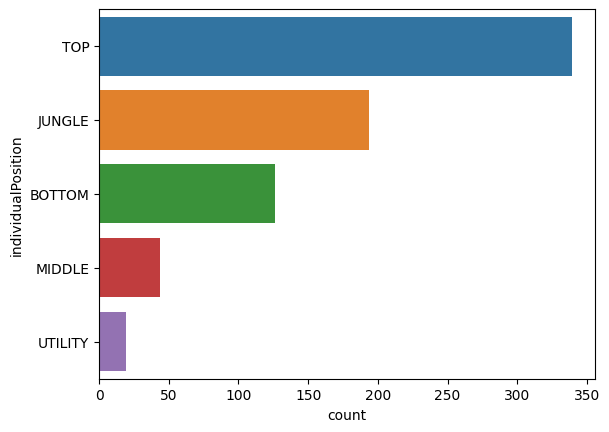

In [11]:
position = pd.DataFrame(games_from_GCDariusBrando['individualPosition'].value_counts()).reset_index().rename(columns={'index':'role'})

sns.barplot(x='count', y='individualPosition', data=position)

De las partidas que juega el jugador, en su mayoria observamos que va __TOP__ seguido por __JUNGLE__ y __BOTTOM__. De esta forma podemos concluir que el jugador tiene preferencia por jugar en la linea de TOP y en caso de no poder, juega como JUNGLE o BOTTOM. Pero... ¿Si queremos realizar un doble click en estas partidas veremos algun cambio en el comportamiento del jugador?¿Veremos si juega mejor en alguna linea que otra?

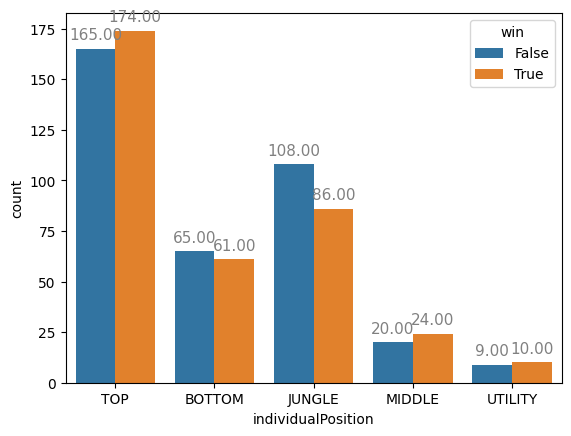

In [12]:
# Veremos la cantidad de veces que el jugador jugo en cada una de las lineas
# Generamos un df vacio para almacenar los datos
wins_role = pd.DataFrame()

# Generamos los roles
roles = games_from_GCDariusBrando['individualPosition'].unique()

# Creamos un loop que guarde cada rol
for role in roles:
    
    # Seleccionamos el rol de la linea
    wins = pd.DataFrame(games_from_GCDariusBrando[games_from_GCDariusBrando['individualPosition'] == role][['win','individualPosition']]
             .value_counts()).reset_index().rename(columns={0:'total'})
    
    # Almacenamos los datos
    wins_role = pd.concat([wins_role, wins], ignore_index=True)

    
ax = sns.barplot(x='individualPosition', y='count', hue='win', data=wins_role)

# Agregamos los valores de cada barra
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                textcoords='offset points')

# Mostramos el gráfico
plt.show()

Como se pudo observar anteriormente, el porcentaje de victoria del jugador en cada linea es muy similar a lo que habiamos hablado anteriormente. Podemos ver una variedad en las lineas de __TOP__ y de __JUNGLE__, en donde vemos que tiene mayor taza de victoria como TOP que como JUNGLE. Por otro lado si analizamos __BOTTOM, MIDDLE & UTILITY__ vemos que el jugador tiene casi el 50% de victorias y derrotas en las lineas.

## Cantidad de jugadas con asesinatos multiples 4.5

_Identificaremos en cuantas jugadas que realizo el jugador, consiguio obtener un asesinato multiple. Esto es ventajoso para el jugador dado que con ellas obtiene gran cantidad de oro para la compra temprana de objetos y sacar mayor ventaja en la linea_

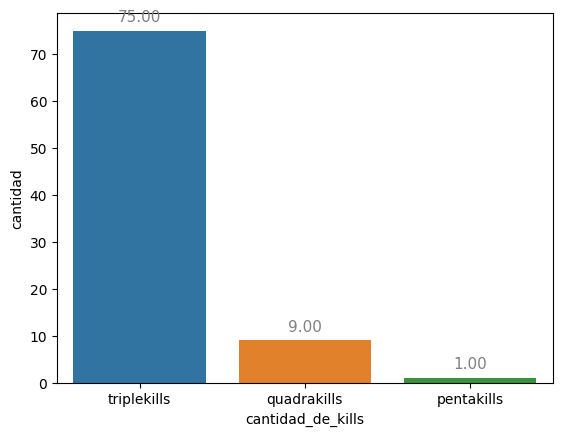

In [14]:
# Generamos un df que nos diga la cantidad de veces que el jugador haya generado una quadra o una pentakill
dic = {'triplekills':games_from_GCDariusBrando[games_from_GCDariusBrando['tripleKills'] != 0]['id_game'].count(), 'quadrakills':games_from_GCDariusBrando[games_from_GCDariusBrando['quadraKills'] != 0]['id_game'].count(), 'pentakills'
 :games_from_GCDariusBrando[games_from_GCDariusBrando['pentaKills'] != 0]['id_game'].count()}
dic = pd.DataFrame.from_dict(dic, orient='index').reset_index().rename(columns={0:'cantidad', 'index':'cantidad_de_kills'})

# Ahora generaremos un grafico de barras
ax= sns.barplot(x='cantidad_de_kills', y='cantidad', data=dic)

# Agregamos los valores de cada barra
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                textcoords='offset points')
    
plt.show()

Considerando que estamos analizando más de 700 partidas podemos asumir tres cosas en base a las mismas:

- El jugador realiza una triple kill en el 10% de sus partidas.
- El jugador realiza un asesinato cuadruple en el 1.2% de sus partidas.
- El jugador no frecuenca pentakills dado que vemos que en mas de 700 partidas, unicamente posee uno.

## Farmeo por minuto 4.6

_En el juego una de las maneras mas comunes de obtener oro para comprar objetos es atravez del farmeo de minions/subditos. En base a ello hay reglas que indican aprox cuanto es el farmeo recomendado para cada minuto de la partida y de esta forma poder analizar un poco el farmeo por minuto del jugador._

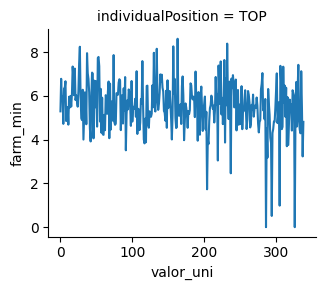

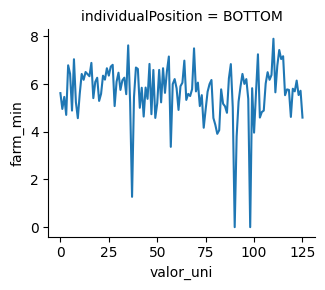

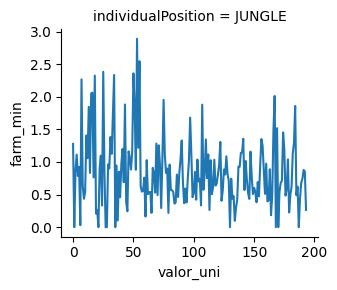

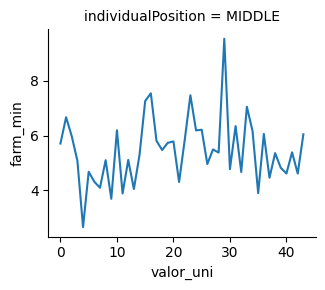

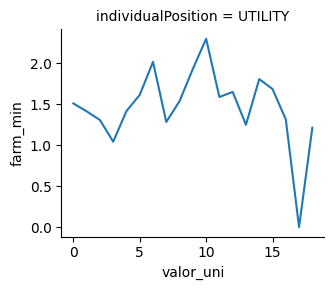

In [15]:
# Crearemos un df para transformar los datos
cols = ['individualPosition', 'win', 'totalMinionsKilled', 'timePlayed']
minions = games_from_GCDariusBrando[cols]

# Creamos un bucle que nos genere un grafico para cada una de las lineas.
for role in roles:
    
    # Seleccionamos el df a usar
    farm_linea = minions[minions['individualPosition'] == role]
    
    # Una vez que tenemos el df que nos genere una columna con un valor unico para cada fila
    num_filas = len(farm_linea)
    valores_unicos = range(num_filas)
    farm_linea['valor_uni'] = valores_unicos
    farm_linea['farm_min'] = farm_linea['totalMinionsKilled']/(farm_linea['timePlayed']/60)
    
    # Crear una cuadrícula de subplots con un subplot por cada rol
    g = sns.FacetGrid(data=farm_linea, col='individualPosition', col_wrap=3)

    # Aplicar la función sns.lineplot() a cada subplot de la cuadrícula
    g.map(sns.lineplot, x='valor_uni', y='farm_min', data=farm_linea)

    # Mostrar los gráficos
    plt.show()
    wn.filterwarnings('ignore')

En este juego tenemos diversas formas de obtener oro, el cual sirve para mejorar a nuestro campeon y hacerlo mas fuerte. Algunas de esas metodologias son: asesinatos, destruir torres o farmear minions/subditos. Para ello es de vital importancia la precision del jugador de realizar el ultimo golpe en el momento justo, lo que llamaos last hit. Entonces en base a esto, decidimos evaluar el farmeo del jugador en cada linea de juego. Lo que calculamos fue el farmeo por minuto del jugador para de esta forma tener una comparacion mas real entre las distintas lineas.
- __TOP__ : Vemos que es una linea en la que el jugador posee mucha experiencia dado que suele tener multiples partidas con un farmXmin de 8 o por lo general tiene una media entre 5 y 6. En esta linea que ademas de ser la que mas juega el jugador vemos que es de las que mejor domina.
- __BOTTOM__ : Se ve que el jugador domina la linea con multiples partidas con un farmXmin de 7 pero teniendo generalmente la media en 6.
- __JUNGLE__ :La linea pareciera indicar que no requiere mucho de farmeo dado que observamos que la media del farmXmin baja muchisimo en comparacion a ls otras con una media entre 0.5 y 1.
- __MIDDLE__ : Para las pocas partidas que posee el jugador vemos que la media ronda entre un farmXmin de 5.
- __UTILITY__ : Para la cantidad reducida de partidas que vemos hay aproximadamente un farmXmin de 1. Observamos que la linea no requiere del farmeo para conseguir oro o no es una de las fortalezas del jugador.

## KDA (kills, deaths, assistants) 4.7

_En la gran mayoria de los juegos existe un indicador llamado KDA, con el cual se mide la cantidad de asesinatos, asistencias y muertes que tuvo el jugador en una partida. En base a estos tres parametro lo que se hace es, sumar los asesinatos y asistencias, y se divide por la cantidad de muertes que tuvo. De esta forma sabemos que a mayor KDA, el jugador demuestra realzar una mayor cantidad de ases y asist que por cada muerte que tiene._

La mediana del KDA para la linea de TOP es de 2.0.


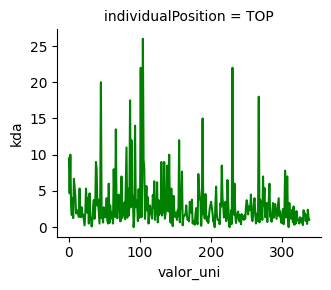

La mediana del KDA para la linea de BOTTOM es de 2.11.


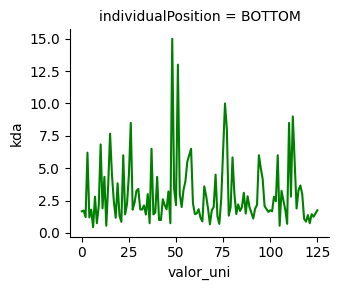

La mediana del KDA para la linea de JUNGLE es de 2.17.


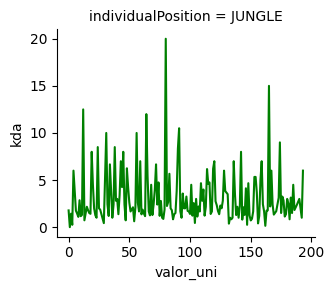

La mediana del KDA para la linea de MIDDLE es de 2.0.


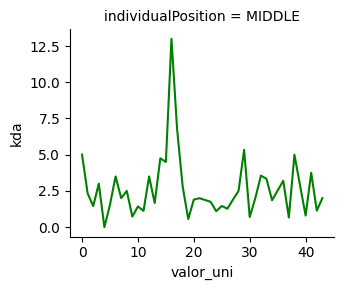

La mediana del KDA para la linea de UTILITY es de 2.26.


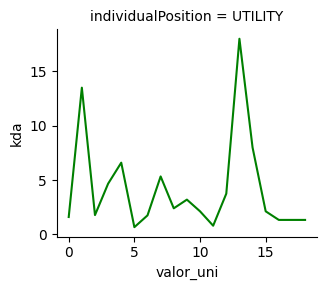

In [16]:
# Crearemos un df para transformar los datos
cols = ['win', 'kills', 'deaths', 'assists', 'individualPosition', 'championName']
game_kda = games_from_GCDariusBrando[cols]

# Creamos un bucle que nos genere un grafico para cada una de las lineas.
for role in roles:
    
    # Seleccionamos el df a usar
    kda_x_line = game_kda[game_kda['individualPosition'] == role]
    
    # Una vez que tenemos el df que nos genere una columna con un valor unico para cada fila
    num_filas = len(kda_x_line)
    valores_unicos = range(num_filas)
    kda_x_line['valor_uni'] = valores_unicos
    
    # Calculamos el kda de cada juego
    kda_x_line['kda'] = (kda_x_line['kills'] + kda_x_line['assists'])/kda_x_line['deaths']
    kda_meadiana = round(kda_x_line['kda'].median(), 2)
    
    # Crear una cuadrícula de subplots con un subplot por cada rol
    g = sns.FacetGrid(data=kda_x_line, col='individualPosition', col_wrap=3)

    # Aplicar la función sns.lineplot() a cada subplot de la cuadrícula
    print(f'La mediana del KDA para la linea de {role} es de {kda_meadiana}.')
    g.map(sns.lineplot, x='valor_uni', y='kda', data=kda_x_line, color='green')

    # Mostrar los gráficos
    plt.show()
    wn.filterwarnings('ignore')

Una medida para medir la habilidad de juego del jugador es la que se llama el KDA, en donde se mide los asesinatos, asistencias y muertes que tuvo el jugador a lo largo de una partida. Segun informacion del juego, un KDA promedio se ubica en un valor de 3, por debajo de este diremos que es pobre y caso contrario es un KDA mayor.

Gracias a lo mencionado anteriormente podemos ver que el jugador posee un KDA inferior al promedio de jugadores. Si observamos la mediana de las lineas, podemos ver que el mejor desempeño del jugador es en la linea de MIDDLE, que se puede deber a la poca cantidad de partidas al mismo tiempo. Luego vemos que las lienas que mas domina estan en segundo lugar con una diferencia de 0.03 nada mas que esta asociado a las lineas de TOP y JUNGLE. Por ultimo, se ve claramente como las lineas que no frecuenta son las peores, refiriendonos a la de BOT y UTILITY.

## KDA por campeon 4.8

_Al igual que como lo analizamos anteriormente, ahora lo que podemos ver es como se desempeña el kda segun el personaje que suele jugar en las partidas._

El promedio del KDA para el campeon Darius es de 2.95.


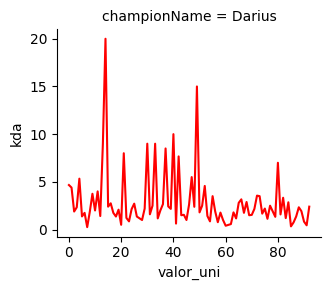

El promedio del KDA para el campeon Vayne es de 2.7.


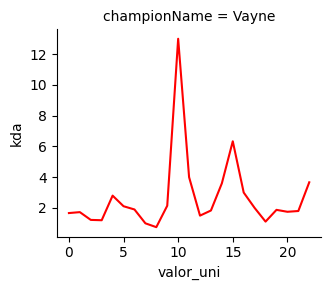

El promedio del KDA para el campeon Warwick es de 3.15.


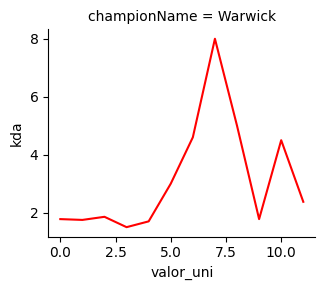

El promedio del KDA para el campeon Mordekaiser es de inf.


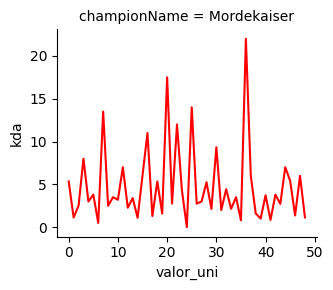

In [17]:
# Crearemos un df para transformar los datos
cols = ['win', 'kills', 'deaths', 'assists', 'individualPosition', 'championName']
champions = ['Darius', 'Vayne', 'Warwick', 'Mordekaiser']
game_kda = games_from_GCDariusBrando[cols]
game_kda = game_kda[game_kda['championName'].isin(champions)]

# Creamos un bucle que nos genere un grafico para cada una de las lineas.
for champ in champions:
    
    # Seleccionamos el df a usar
    kda_x_line = game_kda[game_kda['championName'] == champ]
    
    # Una vez que tenemos el df que nos genere una columna con un valor unico para cada fila
    num_filas = len(kda_x_line)
    valores_unicos = range(num_filas)
    kda_x_line['valor_uni'] = valores_unicos
    
    # Calculamos el kda de cada juego
    kda_x_line['kda'] = (kda_x_line['kills'] + kda_x_line['assists'])/kda_x_line['deaths']
    kda_meadiana = round(kda_x_line['kda'].mean(), 2)
    
    # Crear una cuadrícula de subplots con un subplot por cada rol
    g = sns.FacetGrid(data=kda_x_line, col='championName', col_wrap=3)

    # Aplicar la función sns.lineplot() a cada subplot de la cuadrícula
    g.map(sns.lineplot, x='valor_uni', y='kda', data=kda_x_line, color='red')
    print(f'El promedio del KDA para el campeon {champ} es de {kda_meadiana}.')


    # Mostrar los gráficos
    plt.show()
    wn.filterwarnings('ignore')

Una hipotesis indicaria que a medida que uno mas juega con un campeon, mejoraran mas sus habilidades con el mismo por loq ue obtendria un mayor KDA. En el caso del jugador que estamos analizando se nos presento un caso distinto. Vemos que cuanto mas juegue el jugador con sus campeones principales no indican una mejorar considerable en le KDA de los mismo. Por lo que la hipotesis temprana que se pudo haber montada queda descartada para este caso.

## Vision en el mapa 4.9

_En el juego existen los items llamados wards, con los cuales podremos visualizar al enemigo. Por cada vez que el jugador identifica a un enemigo o destruye un ward de los mismos, obtiene lo que se llama punto de vision (visionScore). A mayor nivel de vision el jugador demuestra interes por observaciones en el mapa y gran estrategia de juego al obtener informacion visual de los enemigos._

<Axes: xlabel='individualPosition', ylabel='visionScore'>

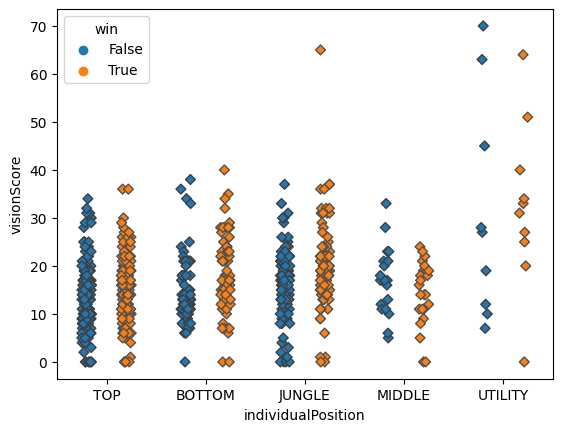

In [18]:
# Seleccionamos los datos que vamos a usar
games_from_GCDariusBrando

# Realziamos el grafico
sns.stripplot(x='individualPosition',
              y='visionScore',
              linewidth=1,
              marker='D',
              hue='win',
              dodge=True,
              data=games_from_GCDariusBrando)

In [19]:
fig = px.line_polar(games_from_GCDariusBrando, r='visionScore', theta='individualPosition', line_close=True, markers=True)
fig.update_traces(fill = 'toself')


fig.show()
wn.filterwarnings('ignore')

AttributeError: 'DataFrame' object has no attribute 'append'

En el juego hay un factor importante que es la vision en el mapa. Para ello estan objetos llamados ward que brindan vision en el mapa. Cuando uno pone vision en el mapa con los wards, tiene mayor probabilidad de ver cuando el equipo enemigo viene en conjunto para atacarte. De esta forma, a mayor visibilidad, mayor probabilidad de planificar tu tecnica de juego.

En base a lo que hablamos anteriormente, podemos ver que la mayoria de las partidas en las que el jugador gano tiene un puntaje de vision mas alto respecto a las que perdio. De esta forma vemos que la vision es un factor a tomar en cuenta a la hora de planificar la estrategia de juegon para lograr ganar. 

Se ve que el rol que uno juege tambien influencia en la partida. Se puede ver que el rol de _UTILITY_ es el que mayor puntuaje tiene respecto al resto. Las otras lineas poseen bastantes similitudes en los puntos de vision indicando que no es un una funcion tan relevante en esos casos. 

## Mapa de correlacion de variables 4.10

_Existen relaciones que nosotros no vemos facilmente por nuestros conocimientos. De esta forma, se sule usar un algoritmo de correlacion de variables para que nos diga si estan se relacionan de formas que nosotros no imaginamos normalmente. Para realizar este paso emplearemos uso de funciones que emplaremos mas adelante pero por cuestiones de orden las vamos a emplear aqui_

In [20]:
# Eliminamos las columnas de mayor cantidad
df_games_for_matrix = df_games.drop(df_games.columns[106:251], axis=1)

# Eliminamos las columnas que estan completamente vacias
df_games_for_matrix = df_games_for_matrix.drop(columns=['riotIdName', 'riotIdTagline'])

# Rellenamos las columnas que nos quedan con valores igual a 0
df_games_for_matrix.fillna(0)

# Realizamos la matriz de correlacion
corr_matrix = df_games_for_matrix.corr()

# Como sabemos que hay una diagonal que tenemos valores simetricos de un lado al otro, emplaremos un solo lado.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

# Por ultimo crearemos un heatmap para ver la relacion de los datos
f, ax = plt.subplots(figsize=(15, 10)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      vmin = -1, 
                      vmax = 1,
                    )

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

ValueError: could not convert string to float: 'Jayce'

Dada la gran cantidad de variables que poseemos el grafico no se logra comprender en lo mas minimo. Haria faltar agrandarlo demasiado y analizar cada variable llevaria demasiado tiempo. Ya que ocurre esto, se optara por realizar un filtrado de la correlacion de las variables, en este nos quedaremos unicamente con aquellas que el modulo del valor sea mayor a |0.5|.

En base a las acciones mencionadas anteriormente nos quedara el __siguiente grafico:__

In [17]:
# Generamos una mascara con aquellas relaciones mayores al |0.5|
mask = np.abs(corr_matrix) >= 0.5

# Generamos la nueva matrix con los valores filtrados
corr_matrix_filter = corr_matrix[mask]

# Reemplazamos los valores faltante con un 0 para que no se vea la relacion que existe
corr_matrix_filter.fillna(0, inplace=True)

# Como sabemos que hay una diagonal que tenemos valores simetricos de un lado al otro, emplaremos un solo lado.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

# Por ultimo crearemos un heatmap para ver la relacion de los datos
f, ax = plt.subplots(figsize=(25, 35)) 
heatmap = sns.heatmap(corr_matrix_filter, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

NameError: name 'corr_matrix' is not defined

Gracias al grafico que vemos, podemos ver algunas de las relaciones como las que hay en el recuadro de abajo.

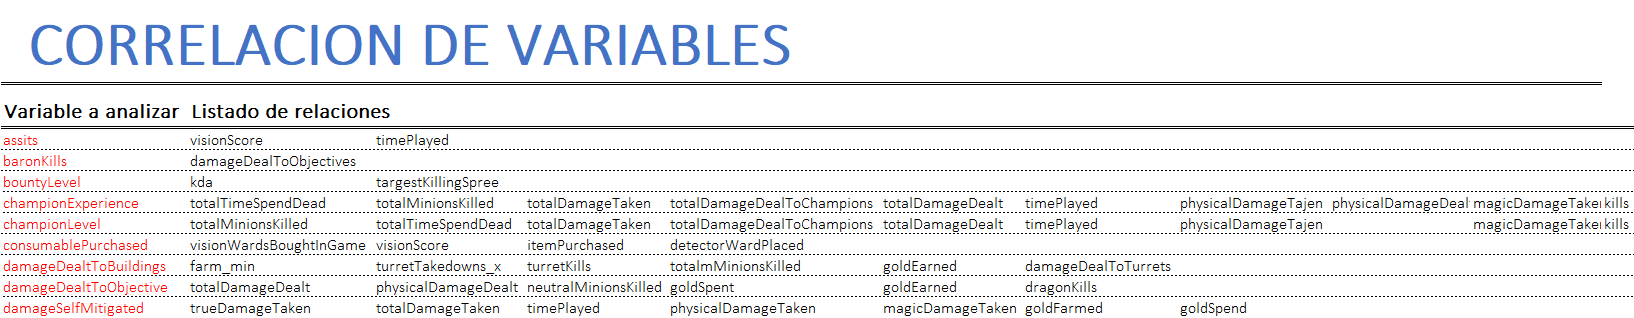

En base a esto, podemos ver que hay multiples relaciones que no son lo que esperabamos y hay mas de las esperadas. Con esta informacion, ya nos podemos hacer una idea de cuales seran las variables que implementaremos para nuestro modelo de machine learning. Si la variable posee aunque sea una relacion alta con otra, ya sera una seleccionada para el modelo. Luego veremos si hay que modificar algunos criterios y perfeccionar la selecion de las mismas.

_Veamos una de estas como ejemplo._

## Asistencias en partida 4.11

_las asistencias en una partida hace referencia a cada vez que un jugador ayudo a otro de cualquier forma a obtener una kill. En base a lo visto en el indice anterior vimos que existe una relacion para esta por lo que observemosla un poco mas_

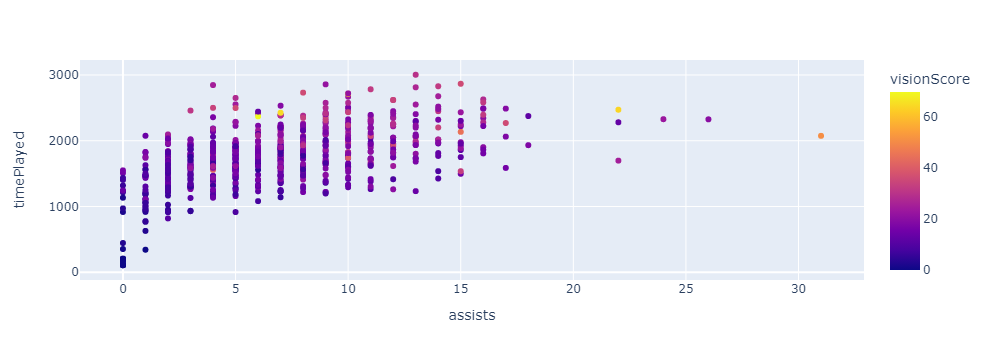

In [22]:
fig = px.scatter(games_from_GCDariusBrando,
                 x="assists",
                 y="timePlayed", 
                 color="visionScore", 
                #  size_max=25
                )

fig.show()

Como podemos observar existe una relacion imoprtante entre estas variables. Podemos observar que cuanto mayor sea la duracion de la partida del jugador y la cantidad de asistencias, mayor sera es la puntuación de visión del mismo. Se logra observar una relacion si miramos lineas horizontales para analizar vemos que cuanto mas cresca el eje x y el eje y mas son los puntajes de vision. 

Por otra parte, se observa que la relacion de los puntajes de visión estan más asociados al tiempo de juego que a la cantidad de asistencias. Pero existe una relacion como podemos ver en el primer 50% del grafico.

# 5. Data wrangling 

## Descubrimiento 5.1

En base a lo visto en los graficos anteriores y analizando las bases de datos, se vio la posibilidad de enriquecer mas el dataframe mediante la creacion de algunas medidas que pueden ser de importancia a la hora de realziar el analisis:
- KDA
- FARM_MIN
- Puntos con cada campeon
- Nivel de cada campeon del jugador

Luego de crear dichas medidas en el dataframe se analizara el mejor metodo para el tratamiento de los valores nulos que se generaran en gran cantidad de las filas.

## Estructuracion 5.2

En lo que respecta a la estructura del df no hara falta realziar ningun trabajo dado que es algo que se trabajo al comienzo de la obtencion de los mismos datos. Al extraer los datos de las APIS hicieron falta el tratamiento de multiples tipos de datos y jugar con ellos para extraerr correctamente todo.

## Limpieza 5.3

In [6]:
# Contemos la cantidad de valores nulos que poseemos en algunas columnas

columnas = ['riotIdName','riotIdTagline','inhibitorTakedowns','basicPings','allInPings','abilityUses']

for columna in columnas:
    
    # Vemos el listado de columnas y nos diga la cantidad de nulos
    print(f'La cantidad de filas nulas en la columna {columna} es de un total de', df_games[columna].isnull().sum())

La cantidad de filas nulas en la columna riotIdName es de un total de 7220
La cantidad de filas nulas en la columna riotIdTagline es de un total de 7220
La cantidad de filas nulas en la columna inhibitorTakedowns es de un total de 120
La cantidad de filas nulas en la columna basicPings es de un total de 5360
La cantidad de filas nulas en la columna allInPings es de un total de 5690
La cantidad de filas nulas en la columna abilityUses es de un total de 4690


Dada la cantidad de valores nulos que tenemos podemos optar por los siguientes procesos. Como la mayoria de valores nulos exeden el 50% de la muestra, lo mejor que podremos hacer para estos casos es eliminar las columna del analisis. Esto se debe a que el historial de datos que estamos tomando es muy antiguo por lo que los datos que se van almacenando varias. Si deseamos realziar el mismo analisis pero con lapsos de tiempo mas corto, tranquilamente podriammos tomar el historial de una cantidad de partidas X con el cual podriamos trabajar de otra manera estos valores. En el caso de la columna _inhibitorTakedowns_ reemplazaremos los valores nulos con un 0 unicamente al ser un porcentaje chico de la muestra

106
playedChampSelectPosition
Se finalizo el proceso de limpieza


<Axes: >

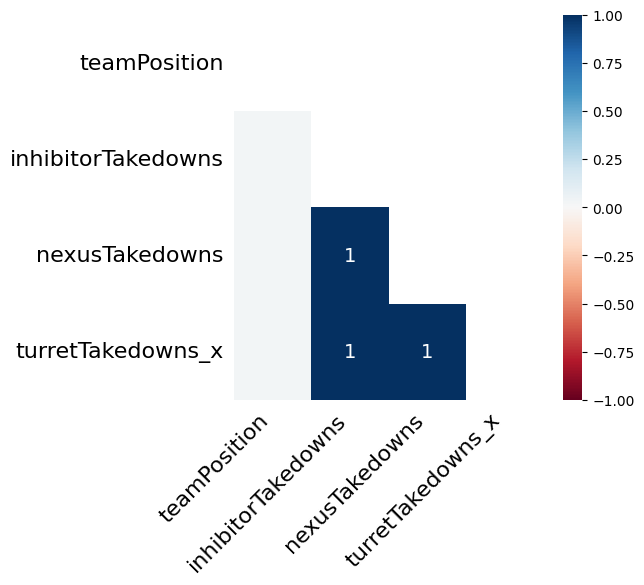

In [7]:
# vemos desde que columna hasta cual hay que eliminar
print(df_games.columns.get_loc('eligibleForProgression'))
print(df_games.columns[250])

# Eliminamos las columnas de mayor cantidad
df_games.drop(df_games.columns[106:251], axis=1, inplace=True)

# Eliminamos las columnas que estan completamente vacias
df_games.drop(columns=['riotIdName', 'riotIdTagline'], inplace=True)

# Rellenamos las columnas que nos quedan con valores igual a 0
df_games.fillna(0)

print('Se finalizo el proceso de limpieza')

# Realizamos un grafico para ver los datos faltantes
msno.heatmap(df_games,
         figsize=(5,5)
         )

Como podemos observar siguen quedando datos nulos en aquellas columnas en donde tengamos un valor igual a 1.

Veamos un poco sobre estas mismas y veamos que tantos valores nos quedan asi vemos como los podemos trabajar.

<Axes: >

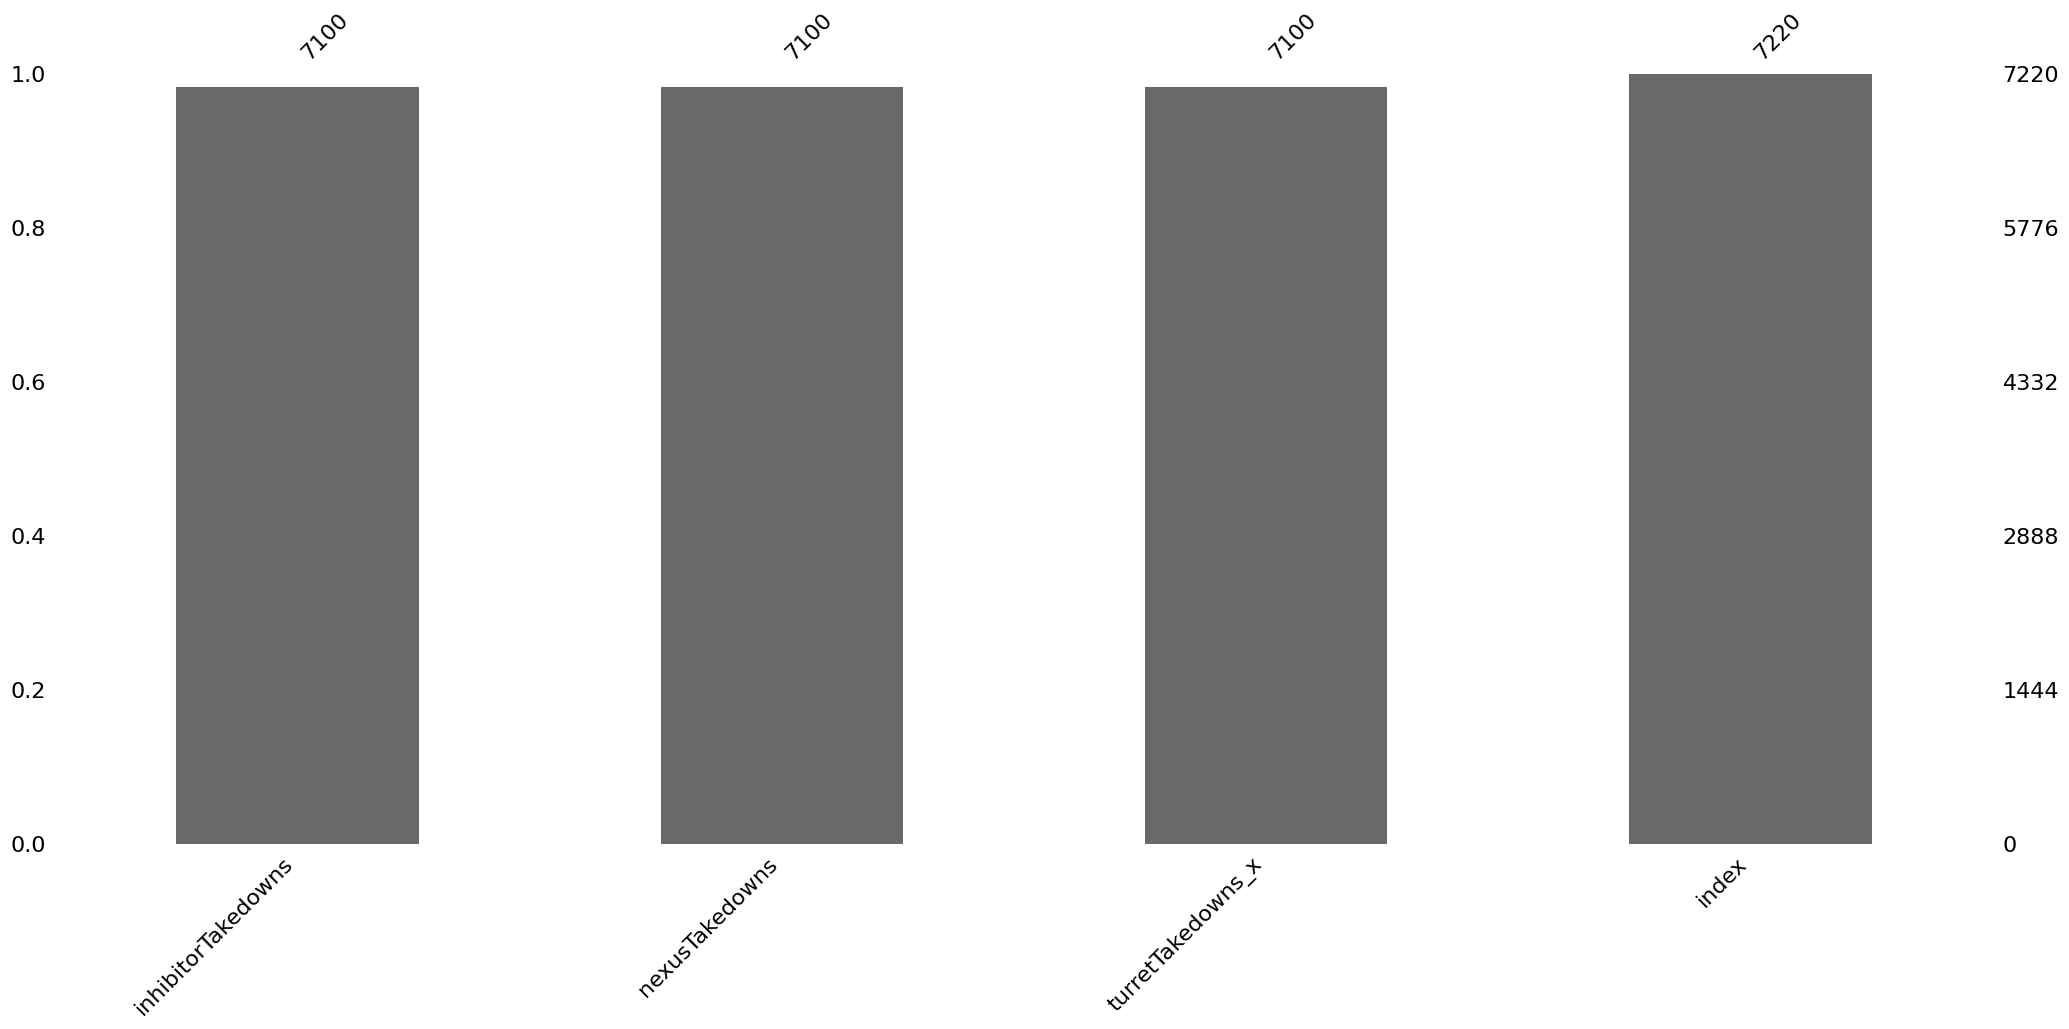

In [8]:
# Seleccionamos las columnas que poseen valores nulos y una que no para ver el total
Col_con_nulos = ['inhibitorTakedowns','nexusTakedowns', 'turretTakedowns_x','index']

# Graficamos estos datos
msno.bar(df_games[Col_con_nulos],
        #  figsize=(7,5)
         )

Podemos trabajar estos datos nulos de otra forma gracias a la poca cantidad que son respecto al resto. La idea que se propone para el trabajo de estos tiene que ver con reemplazar estos valores _NaN_ con _el promedio de la columna_. De esta forma a la hora de analizar la columna, estos datos no tendran un gran impacto en el mismo.

In [9]:
# Calculamos el promedio de cada una de estas columnas
# Selecionamos las columnas a trabajar
columns = ['inhibitorTakedowns','nexusTakedowns', 'turretTakedowns_x']

# Realizamos el bucle para estas columnas
for col in columns:
    
    # Calculamos el promedio de la col
    prom_col = round(df_games[col].mean(), 0)
    
    # Reemplazamos los NaN con estos valores
    df_games[col].fillna(prom_col, inplace=True)
    
print("Perfect: Se finalizaso el proceso de reemplazo de nulos!")

Perfect: Se finalizaso el proceso de reemplazo de nulos!


## Enriquecimiento 5.4

In [10]:
# Crearemos las columans extras para el analisis que agregan valor
df_games['kda'] = (df_games['kills'] + df_games['assists'])/df_games['deaths']

# Creamos la segunda columna de interes
df_games['farm_min'] = df_games['totalMinionsKilled']/(df_games['timePlayed']/60)

## Validacion 5.5

La mediana del KDA para la linea de TOP es de 2.0.


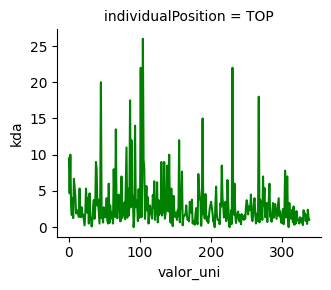

La mediana del KDA para la linea de BOTTOM es de 2.11.


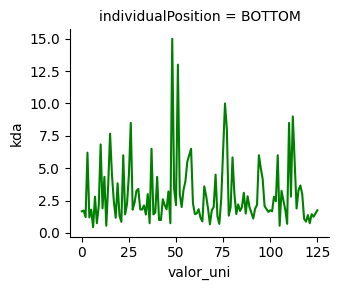

La mediana del KDA para la linea de JUNGLE es de 2.17.


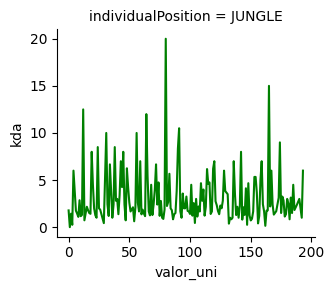

La mediana del KDA para la linea de MIDDLE es de 2.0.


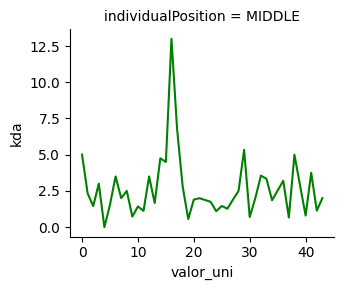

La mediana del KDA para la linea de UTILITY es de 2.26.


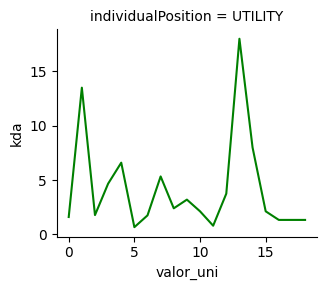

In [13]:
# Creamos un bucle que nos genere un grafico para cada una de las lineas.
for role in roles:
    
    # Seleccionamos el df a usar
    kda_x_line = df_games[df_games['individualPosition'] == role]
    kda_x_line = kda_x_line[kda_x_line['summonerId'] == 'K2twAA5gA-gMXY4YVq0szKaX-er9Hlhz8sitMu4lzN00Qw']
    
    # Una vez que tenemos el df que nos genere una columna con un valor unico para cada fila
    num_filas = len(kda_x_line)
    valores_unicos = range(num_filas)
    kda_x_line['valor_uni'] = valores_unicos
    
    # Calculamos el kda de cada juego
    kda_meadiana = round(kda_x_line['kda'].median(), 2)
    
    # Crear una cuadrícula de subplots con un subplot por cada rol
    g = sns.FacetGrid(data=kda_x_line, col='individualPosition', col_wrap=3)

    # Aplicar la función sns.lineplot() a cada subplot de la cuadrícula
    print(f'La mediana del KDA para la linea de {role} es de {kda_meadiana}.')
    g.map(sns.lineplot, x='valor_uni', y='kda', data=kda_x_line, color='green')

    # Mostrar los gráficos
    plt.show()
    wn.filterwarnings('ignore')

Los valores para el jugador principal coinciden perfectamente. Lo que hay que trabajar son los casos en los que un jugador posee un KDA perfecto, osea que murio una cantidad de 0. En este caso actualmente nos genera un inf, hay que buscar la forma de evaluar fila por fila y generar un condicional if en donde si las muertes son 0 que divida por 1

# 6. Feature selection 

## Encoding de variables & limpieza 6.1

Lo que realizaremos en este paso es seleccionar aquellas variables que consideremos de mayor relevancia para la hora de realizar el modelo de ML. Aqui podremos emplear el grafico de correlacion que hicimos en la instancia de EDA.

In [11]:
# Generamos una mascara con aquellas relaciones mayores al |0.5|
mask = np.abs(corr_matrix) >= 0.25

# Generamos la nueva matrix con los valores filtrados
corr_matrix_filter = corr_matrix[mask]

# Reemplazamos los valores faltante con un 0 para que no se vea la relacion que existe
corr_matrix_filter.fillna(0, inplace=True)

# Como sabemos que hay una diagonal que tenemos valores simetricos de un lado al otro, emplaremos un solo lado.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

# Por ultimo crearemos un heatmap para ver la relacion de los datos
f, ax = plt.subplots(figsize=(25, 35)) 
heatmap = sns.heatmap(corr_matrix_filter, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

NameError: name 'corr_matrix' is not defined

En base a la imagen generada arriba, podemos determinar cuales son las variables más importantes a conciderar para un primer modelo de machine learning. Aquellas que esten drentro del recuadro celeste y con un valor distinto de 0 seran las que tomaremos para un primer modelo.

In [60]:
# # Seleccionamos las variables resaltadas en nuestro recuadro
# variables = ['assists','bountyLevel','damageDealtToBuildings','damageDealtToObjectives','damageDealtToTurrets','damageSelfMitigated','detectorWardsPlaced','inhibitorKills','inhibitorsLost',
#              'largestKillingSpree','nexusKills','nexusLost','totalTimeSpentDead','turretKills','turretsLost','inhibitorTakedowns','nexusTakedowns','turretTakedowns_x','teamPosition', 'win']


# # Nos quedamos con las variables más importantes y las definimos en un df train 
# # df_for_testing = df_games[variables]
# games_from_GCDariusBrando = historial_del_jugador('GC LDCGOD')
# df_for_testing = games_from_GCDariusBrando[variables]

# # Seleccionamos las filas en donde hay valores nulos
# cols_vacias = df_for_testing[df_for_testing['teamPosition'].isna()].index

# # Eliminamos las columnas que indicamos anteriormente
# df_for_testing.drop(cols_vacias, axis=0, inplace=True)

# # Realizaremos un encoding de las variables de "teamPosition"
# le = preprocessing.LabelEncoder()
# le.fit(df_for_testing['teamPosition'])
# list(le.classes_)

# # transformamos las variables
# df_for_testing['teamPosition'] = le.transform(df_for_testing['teamPosition'])
# # list(le.inverse_transform(df_for_testing['teamPosition']))

# # Realizamos encoding de las variables win
# le = preprocessing.LabelEncoder()
# le.fit(df_for_testing['win'])
# list(le.classes_)

# # transformamos las variables
# df_for_testing['win'] = le.transform(df_for_testing['win'])
# # list(le.inverse_transform(df_for_testing['win']))

# # Reseteamos los indices
# df_for_testing.reset_index(inplace=True,
#                            drop=True)

# wn.filterwarnings('ignore')


C:\Users\176935\AppData\Local\Temp\ipykernel_16516\1440064950.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_testing.drop(cols_vacias, axis=0, inplace=True)
C:\Users\176935\AppData\Local\Temp\ipykernel_16516\1440064950.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_testing['teamPosition'] = le.transform(df_for_testing['teamPosition'])
C:\Users\176935\AppData\Local\Temp\ipykernel_16516\1440064950.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Para este segundo criterio de selección de los datos, emplearemos el razonamiento que pudimos intuir del EDA realizado en pasos anteriores.

In [12]:
# Seleccionamos las las variables mas importantes en este segundo modelo
variables2 = ['assists', 'baronKills', 'champExperience', 'damageDealtToBuildings', 'damageDealtToObjectives', 'deaths', 'dragonKills',
           'firstBloodKill', 'goldEarned', 'kills', 'physicalDamageDealtToChampions', 'totalMinionsKilled', 
           'firstTowerKill', 'teamPosition', 'totalDamageDealtToChampions', 'visionScore', 'win']

# Nos quedamos con las variables más importantes y las definimos en un df train 
# df_for_testing = df_games[variables]
games_from_GCDariusBrando = historial_del_jugador('GC LDCGOD')
df_for_testing = games_from_GCDariusBrando[variables2]

# Hay que hacer el encoding de 4 variables
# Definimos el modelo
le = preprocessing.LabelEncoder()

# Realizamos el encoding
columnas = ['firstBloodKill', 'firstTowerKill', 'teamPosition', 'win']
for columna in columnas:
    
    # Empleamos el modelo
    le.fit(df_for_testing[columna])
    list(le.classes_)

    # transformamos las variables
    df_for_testing[columna] = le.transform(df_for_testing[columna])
    # list(le.inverse_transform(df_for_testing['teamPosition']))    
    
    wn.filterwarnings('ignore')

C:\Users\herne\AppData\Local\Temp\ipykernel_14148\291666458.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_testing[columna] = le.transform(df_for_testing[columna])


# 7. Machine learning 

## Preparacion de datos 7.1

In [22]:
# Definimos las columnas que seran el x e y
y_cols = ['win']
x_cols1 = ['assists','bountyLevel','damageDealtToBuildings','damageDealtToObjectives','damageDealtToTurrets','damageSelfMitigated','detectorWardsPlaced','inhibitorKills','inhibitorsLost',
             'largestKillingSpree','nexusKills','nexusLost','totalTimeSpentDead','turretKills','turretsLost','inhibitorTakedowns','nexusTakedowns','turretTakedowns_x','teamPosition']

# Definimos el segundo modelo para x
x_cols2 = ['assists', 'baronKills', 'champExperience', 'damageDealtToBuildings', 'damageDealtToObjectives', 'deaths', 'dragonKills',
           'firstBloodKill', 'goldEarned', 'kills', 'physicalDamageDealtToChampions', 'totalMinionsKilled', 
           'firstTowerKill', 'teamPosition', 'totalDamageDealtToChampions', 'visionScore']

# Definimos el tercer modelo para x
x_cols3 = ['assists', 'champExperience', 'damageDealtToObjectives', 'deaths', 'dragonKills',
           'goldEarned', 'kills', 'totalMinionsKilled',
           'teamPosition', 'totalDamageDealtToChampions', 'visionScore']

# Definimos las variables x y las y 
Y = df_for_testing[y_cols]
X = df_for_testing[x_cols3]

# Definimos los datos de entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.3, ## Definimos el tamaño de los datos que vamos a emplear
                                                    random_state = 50)


## Preparación del modelo 7.2

¡Por supuesto! A continuación, proporcionaré una explicación más detallada de cada modelo y cómo se podría implementar en este caso específico.

__Regresión logística:__
La regresión logística es un modelo de clasificación binaria que se utiliza comúnmente para predecir la probabilidad de que un evento ocurra. En este caso, se puede utilizar para predecir la probabilidad de que un jugador gane o pierda su próxima partida. La regresión logística se puede implementar utilizando cualquier biblioteca de aprendizaje automático en el lenguaje de programación que prefieras, como Scikit-Learn en Python. En primer lugar, se deben dividir los datos en un conjunto de entrenamiento y un conjunto de prueba para evaluar el rendimiento del modelo. Luego, se deben seleccionar las variables que se utilizarán para entrenar el modelo y ajustar los parámetros para obtener la mejor precisión.

__Árboles de decisión:__
Los árboles de decisión son modelos de aprendizaje automático que pueden ser utilizados tanto para tareas de clasificación como de regresión. En este caso, se puede utilizar un árbol de decisión para predecir si un jugador ganará o perderá su próxima partida. El árbol de decisión se puede implementar utilizando cualquier biblioteca de aprendizaje automático en el lenguaje de programación que prefieras, como Scikit-Learn en Python. El árbol de decisión se entrena utilizando las estadísticas previas del jugador, y cada nodo representa una prueba en una variable, como el número de goles que el jugador marcó en el partido anterior. Cada rama representa el resultado de la prueba, como "más de 2 goles", y cada hoja representa una clase, como "ganar" o "perder".

__Random Forest:__
Random Forest es un conjunto de árboles de decisión, cada uno de los cuales se entrena con una muestra aleatoria del conjunto de datos. Los resultados de cada árbol se promedian para hacer una predicción final. En este caso, se puede utilizar Random Forest para predecir si un jugador ganará o perderá su próxima partida. La implementación de Random Forest es similar a la del árbol de decisión, pero se deben ajustar los parámetros para obtener la mejor precisión. La ventaja de Random Forest es que es menos propenso al sobreajuste que un solo árbol de decisión.

__Gradient Boosting:__
Gradient Boosting es un algoritmo que utiliza múltiples modelos de árboles de decisión débiles para construir un modelo fuerte. Cada árbol se ajusta en función de los errores del modelo anterior. En este caso, se puede utilizar Gradient Boosting para predecir si un jugador ganará o perderá su próxima partida. La implementación de Gradient Boosting es similar a la del Random Forest, pero se deben ajustar los parámetros para obtener la mejor precisión. La ventaja de Gradient Boosting es que puede ser más preciso que Random Forest si se ajustan correctamente los parámetros.

### Arbol de desiciones 7.2.1

In [14]:
# Importamos las librerias necesarias para dicho analisis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [61]:
# Creamos una isntancia de arbol de desiciones
clf = DecisionTreeClassifier(criterion='gini',
                             max_depth=3,
                             random_state=15)
clf.fit(x_train, y_train)

# Realizamos un testeo de como resultan los datos
y_pred = clf.predict(x_test)

# Evaluamos la presicion del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'La presición del modelo es de: {accuracy}')

La presición del modelo es de: 0.9172413793103448


[Text(0.5769230769230769, 0.875, 'x[14] <= 6.5\ngini = 0.5\nsamples = 577\nvalue = [291, 286]'),
 Text(0.3076923076923077, 0.625, 'x[17] <= 1.5\ngini = 0.25\nsamples = 307\nvalue = [45, 262]'),
 Text(0.15384615384615385, 0.375, 'x[14] <= 2.5\ngini = 0.498\nsamples = 89\nvalue = [42, 47]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.37\nsamples = 49\nvalue = [12, 37]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.375\nsamples = 40\nvalue = [30, 10]'),
 Text(0.46153846153846156, 0.375, 'x[3] <= 1925.5\ngini = 0.027\nsamples = 218\nvalue = [3, 215]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.018\nsamples = 217\nvalue = [2, 215]'),
 Text(0.8461538461538461, 0.625, 'x[16] <= 0.5\ngini = 0.162\nsamples = 270\nvalue = [246, 24]'),
 Text(0.7692307692307693, 0.375, 'x[11] <= 0.5\ngini = 0.089\nsamples = 258\nvalue = [246, 12]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.38\nsamples = 47\nvalue = [35, 12]'),
 Text(

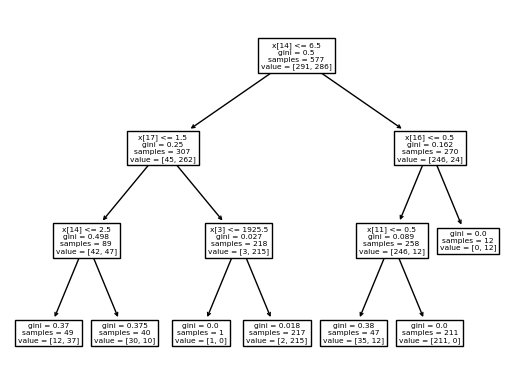

In [65]:
tree.plot_tree(clf)

### Regresion logistica 7.2.2

In [15]:
# Librerias para este modelo
from sklearn.linear_model import LinearRegression, LogisticRegression

In [23]:
# Definimos la funcion
clf = LogisticRegression(solver='sag',
                         penalty='l2',
                         multi_class='ovr')
clf.fit(x_train, y_train)

# Definimos el valor de prediccion
y_train_pred = clf.predict(x_train)
y_pred = clf.predict(x_test)

# Evaluamos la presicion del modelo sobre los valores de entrenamiento
accuracy = accuracy_score(y_train, y_train_pred)
print(f'La presición del modelo sobre los datos de entrenamiento es: {accuracy}')

# Evaluacmos la presicion del modelo sobre los valores de testeo
accuracy = accuracy_score(y_test, y_pred)
print(f'La presición del modelo sobre los datos de testeo es: {accuracy}')

wn.filterwarnings('ignore')

### Primer modelo (primera eleccion de variables) iaccurancy = 93,77%
### Segundo modelo (segunda eleccion de variables) accurancy = 0.871 | 0.829
### Tercer modelo (cambio del modelo de "solver" del algoritmo) accurancy = 0.770 | 0.778
### Cuarto modelo (tercera eleccion de variables) accurancy = 0.695 | 0.691

La presición del modelo sobre los datos de entrenamiento es: 0.695049504950495
La presición del modelo sobre los datos de testeo es: 0.6912442396313364


### Posible solucion de overfitting

Una posible solucion para el overfittig pude ser de lo mas basico:
- Aumentar la cantidad de muestras
- Eliminar columnas

Para esto, lo que deberemos de hacer a su vez es un criterio mas selectivo de las variables que estamos empleando para el analisis. Deberemos de ver:
- Que no tengamos sesgos
- Las variables que estamos tomando
- Que no sea un level por ejemplo que es algo que antes de la partida uno no sabe
- Si los campeones estan balanceados

## Evaluación de los modelos 7.3

### Calculo de matriz de confusión 7.3.1

#### Segundo modelos

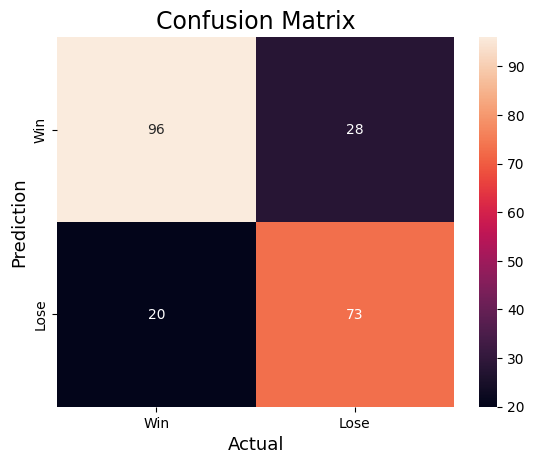

El accuracy del modelo es de:  0.7788018433179723
La precision del modelo es de:  0.7741935483870968
El recall del modelo es de:  0.8275862068965517


In [21]:
# Creamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficamos la matriz de confusión
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Win', 'Lose'],
            yticklabels=['Win', 'Lose'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Calculamos las distintas metricas que tenemos para medir el rendimiento de nuestra matriz
# El accurancy
accuracy = accuracy_score(y_test, y_pred)
print("El accuracy del modelo es de: ", accuracy)

# La precision
precision = (96/(96+28))
print("La precision del modelo es de: ", precision)

# El recall
recall = (96/(96+20))
print("El recall del modelo es de: ", recall)

#### Tercer modelo

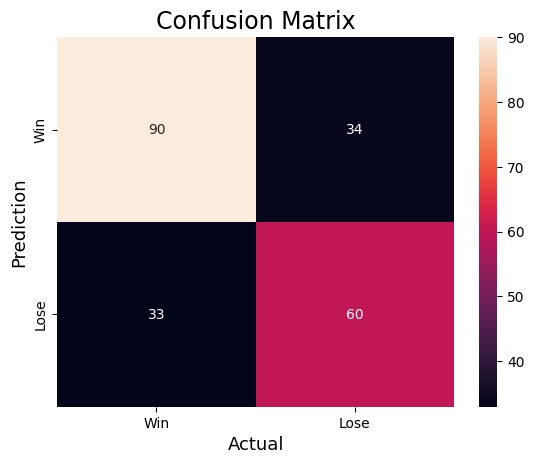

El accuracy del modelo es de:  0.6912442396313364
La precision del modelo es de:  0.7741935483870968
El recall del modelo es de:  0.8275862068965517


In [24]:
# Creamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficamos la matriz de confusión
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Win', 'Lose'],
            yticklabels=['Win', 'Lose'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Calculamos las distintas metricas que tenemos para medir el rendimiento de nuestra matriz
# El accurancy
accuracy = accuracy_score(y_test, y_pred)
print("El accuracy del modelo es de: ", accuracy)

# La precision
precision = (96/(96+28))
print("La precision del modelo es de: ", precision)

# El recall
recall = (96/(96+20))
print("El recall del modelo es de: ", recall)

# 8. Conclusiones 

# 9. Futuras lineas

_Pasos o procesos que faltan realzar en el proyecto y se iran trabajando durante las fechas proximas_

- Trabajar los casos de KDA cuanto las muertes del jugador son 0.
- Modelo de prediccion binario